<a href="https://colab.research.google.com/github/martinahuang/CUS615/blob/master/HeartDisease_Fversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project - Heart Disease**

In [0]:
%%capture
# Execute this cell first to download the necessary data and autility libraries.
# This cell installs sample data necessary for this workshop on your colab virtual enviroment

!wget -O /content/cus615_utils.py https://raw.githubusercontent.com/christoforou/intro_to_pandas_lab/master/cus615_utils/cus615_utils.py

**Libraries**

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from cus615_utils import *
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# **Pre-processing**

In [0]:
datafile = './sample_data/heart.csv'
df = pd.read_csv(datafile)

In [52]:
df.head(10)

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5   57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6   56    0   1       140   294    0  ...      0      1.3      1   0     2       1
7   44    1   1       120   263    0  ...      0      0.0      2   0     3       1
8   52    1   2       172   199    1  ...      0      0.5      2   0     3       1
9   57    1   2       150   168    0  ...      0      1.6      2   0     2       1

[10 rows x 14 columns]

In [0]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target' ]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

**Meaning of the attributes**

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

chest_pain_type: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

resting_blood_pressure: The person's resting blood pressure (mm Hg on admission to the hospital)

cholesterol: The person's cholesterol measurement in mg/dl

fasting_blood_sugar: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

rest_ecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

max_heart_rate_achieved: The person's maximum heart rate achieved

exercise_induced_angina: Exercise induced angina (1 = yes; 0 = no)

st_depression: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

st_slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

num_major_vessels: The number of major vessels (0-3)

thalassemia: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [55]:
df.shape

(303, 14)

In [56]:
df.describe()

age         sex  ...  thalassemia      target
count  303.000000  303.000000  ...   303.000000  303.000000
mean    54.366337    0.683168  ...     2.313531    0.544554
std      9.082101    0.466011  ...     0.612277    0.498835
min     29.000000    0.000000  ...     0.000000    0.000000
25%     47.500000    0.000000  ...     2.000000    0.000000
50%     55.000000    1.000000  ...     2.000000    1.000000
75%     61.000000    1.000000  ...     3.000000    1.000000
max     77.000000    1.000000  ...     3.000000    1.000000

[8 rows x 14 columns]

In [30]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

There are no null values.

# **Data Exploration**

Number of Patients Haven't Heart Disease: 138
Number of Patients Have Heart Disease: 165
Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


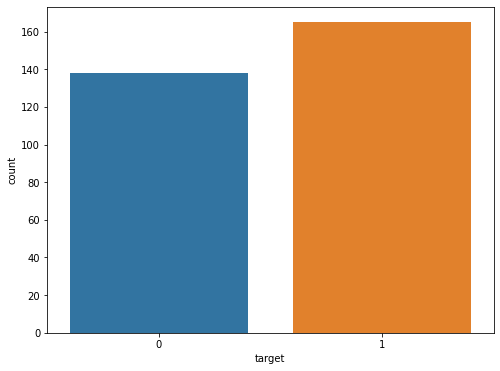

In [31]:
NoDisease = len(df[df.target == 0])
HaveDisease = len(df[df.target == 1])

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df)
print("Number of Patients Haven't Heart Disease: {:.0f}".format((NoDisease)))
print("Number of Patients Have Heart Disease: {:.0f}".format((HaveDisease)))

print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((NoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((HaveDisease / (len(df.target))*100)))
plt.show()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64


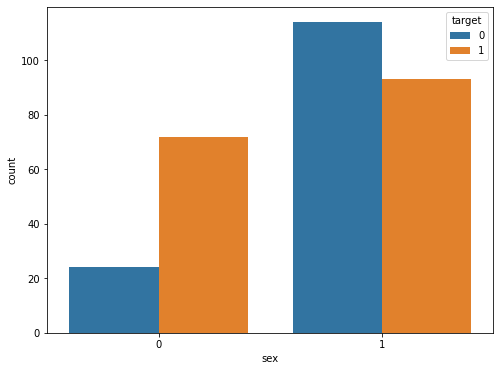

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)

sex_target = df.groupby('sex')['target'].value_counts()
print(sex_target)
plt.show()

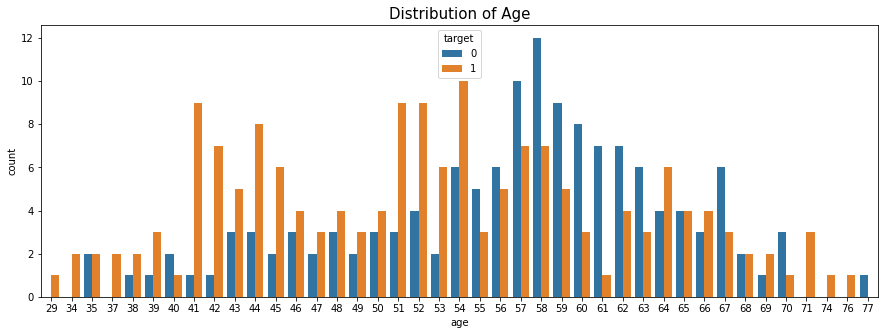

In [33]:
#distribution of Age
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="age", hue="target", data=df)
plt.title('Distribution of Age', fontsize = 15)
plt.show()

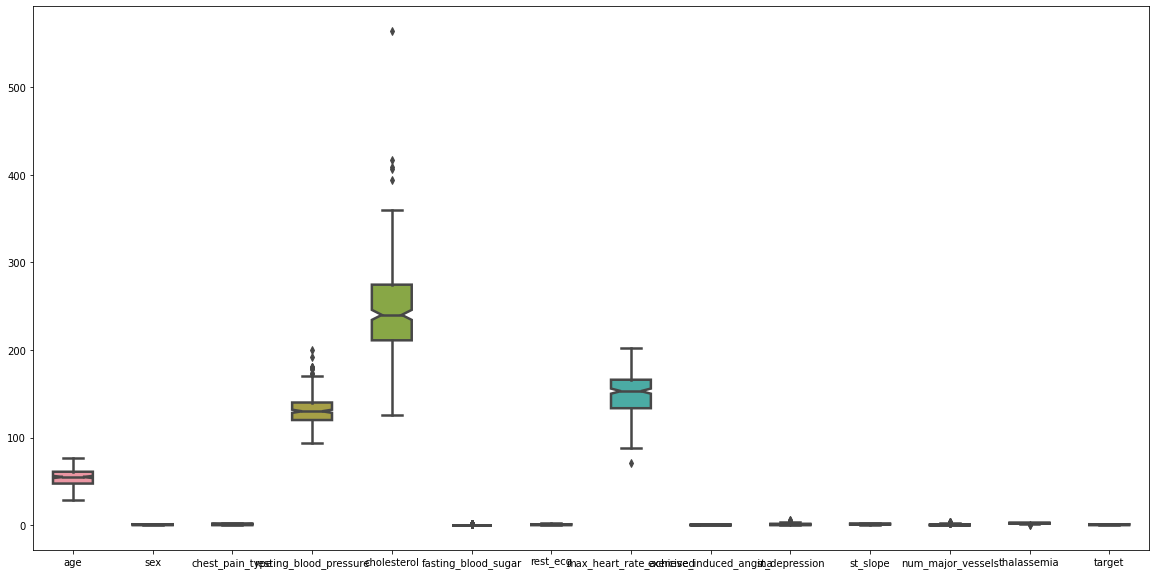

In [34]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(data = df,notch = True,linewidth = 2.5, width = 0.50)
plt.show()

(14.5, -0.5)

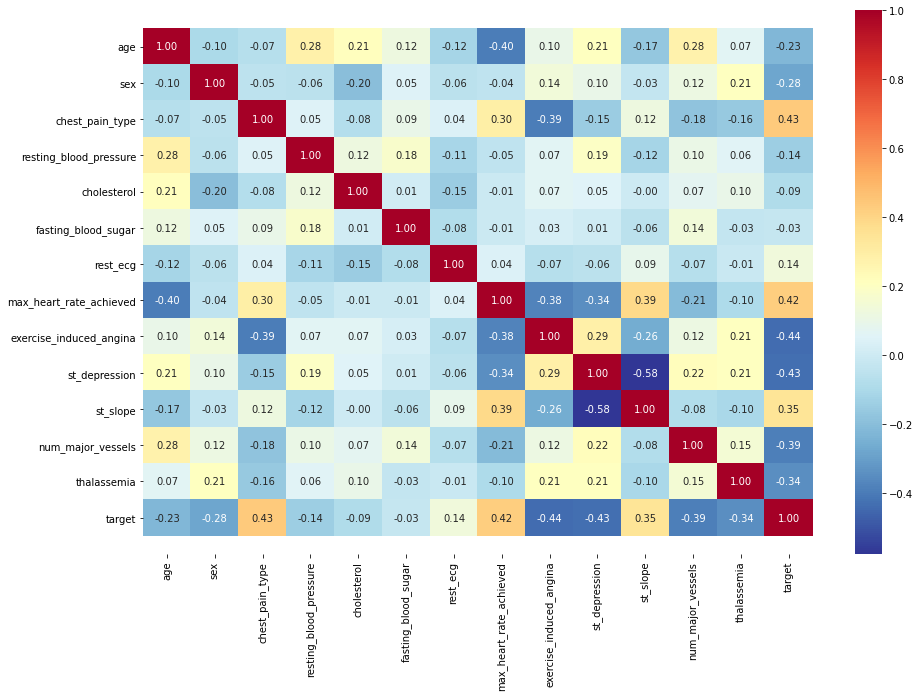

In [35]:
plt.figure(figsize=(15,10))
ax= sns.heatmap(df.corr(),cmap=plt.cm.RdYlBu_r , annot=True ,fmt='.2f')
a,b =ax.get_ylim()
ax.set_ylim(a+0.5,b-0.5)

There are not features with more than 0.5 correlation rate.

# **Splitting the data**

In [0]:
X = df.drop(['target'], axis=1)
y = df['target']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
n_samples_train, n_features = X_train.shape
n_samples_test, _ = X_test.shape
n_classes = len(np.unique(y_train))

print("Number of samples in training set: %d ( %d positive, %d negative)" % (n_samples_train,np.sum(y_train==1),np.sum(y_train==0)))
print("Number of samples in the testing set: %d (%d positive, %d negative)" % (n_samples_test,np.sum(y_test==1),np.sum(y_test==0)))
print("Number of features: " +  str(n_features))
print("Number of classes: " + str(n_classes))
print("IDs for class labels: " + str(np.unique(y_train)))

Number of samples in training set: 242 ( 131 positive, 111 negative)
Number of samples in the testing set: 61 (34 positive, 27 negative)
Number of features: 13
Number of classes: 2
IDs for class labels: [0 1]


# **Cross-Validation**

**knn**

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(knn_predictions[0:10])
print("Accuracy Score:" , knn.score(X_test, y_test))


[0 0 0 0 0 1 0 0 0 0]
Accuracy Score: 0.819672131147541


In [63]:
knn_scores = cross_val_score(knn, X_train, y_train, cv = 5)
print("Scores: ", knn_scores)
print("Accuracy: ", round(knn_scores.mean(), 3) * 100, "%")

Scores:  [0.79591837 0.7755102  0.8125     0.89583333 0.79166667]
Accuracy:  81.39999999999999 %


**Random Forest**

In [64]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print(rf_predictions[0:10])
print("Accuracy Score:" , rf.score(X_test, y_test))

[0 1 1 0 0 1 0 0 0 0]
Accuracy Score: 0.8360655737704918


In [65]:
rf_scores = cross_val_score(rf, X_train, y_train, cv = 5)
print("Scores: ", rf_scores)
print("Accuracy: ", round(rf_scores.mean(), 3) * 100, "%")
print("Standard Deviation: +/-", rf_scores.std())

Scores:  [0.7755102  0.7755102  0.85416667 0.83333333 0.85416667]
Accuracy:  81.89999999999999 %
Standard Deviation: +/- 0.03594575943503586


**SVM**

In [66]:
svm = svm.SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
print(svm_predictions[0:10])
print("Accuracy Score:" , svm.score(X_test, y_test))

[0 1 1 0 0 1 0 0 0 0]
Accuracy Score: 0.8688524590163934


In [67]:
svm_scores = cross_val_score(svm, X_train, y_train, cv = 5)
print("Scores: ", svm_scores)
print("Accuracy: ", round(svm_scores.mean(), 4) * 100, "%")
print("Standard Deviation: +/-", svm_scores.std())

Scores:  [0.73469388 0.73469388 0.85416667 0.875      0.8125    ]
Accuracy:  80.22 %
Standard Deviation: +/- 0.05868665434030449


# **K-Nearest Neighbor**

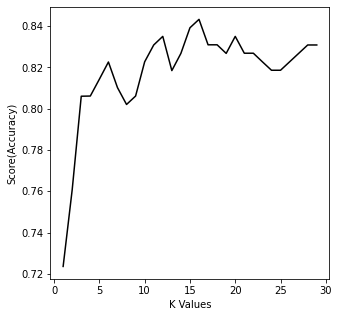

In [68]:
scores = []
for each in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = each)
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    scores.append(score.mean())
    
plt.plot(range(1,30),scores,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [69]:
knn_find = KNeighborsClassifier(n_neighbors = 16) #n_neighbors = K value
knn_find.fit(X_train,y_train) 
knn_prediction = knn_find.predict(X_test)
print("{}-NN Score: {}".format(16,knn_find.score(X_test,y_test)))
knn_score = knn_find.score(X_test,y_test)

16-NN Score: 0.8360655737704918


0.8360655737704918

In [70]:
for i in range(1,11):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    print("k : ",i ,"score : ",knn.score(X_test, y_test), end="\n" )

k :  1 score :  0.819672131147541
k :  2 score :  0.819672131147541
k :  3 score :  0.819672131147541
k :  4 score :  0.819672131147541
k :  5 score :  0.819672131147541
k :  6 score :  0.819672131147541
k :  7 score :  0.819672131147541
k :  8 score :  0.819672131147541
k :  9 score :  0.819672131147541
k :  10 score :  0.819672131147541


# **Random Forest**

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
cv_clf = RandomForestClassifier(max_depth=None, random_state=None)

param_grid = {'n_estimators': [10, 20, 30], 'max_features': ['auto', 'sqrt', 'log2',None], 'max_depth': [5,6,7, None]}


In [79]:
cv_rfc = GridSearchCV(estimator=cv_clf, param_grid=param_grid, cv= 5)
cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [80]:
cv_rfc.best_params_


{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 30}

n_estimators: Number of trees in the forest

max_features: The number of features to consider when looking for the best split

max_depth: The maximum depth of the tree

In [0]:
cv_rfc1=RandomForestClassifier(random_state=None, max_features='sqrt', n_estimators= 30, max_depth=7)

In [82]:
cv_rfc1.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
pred = cv_rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.819672131147541


In [0]:
estimator =cv_rfc1.estimators_[1]
feature_names=[i for i in X.columns]
y_train_str=y_train.astype('str')
y_train_str[y_train_str=='0']='no disease'
y_train_str[y_train_str=='1']='disease'
y_train_str=y_train_str.values

In [85]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [86]:
for i in range(1,11):
    cv_rfc1=RandomForestClassifier(random_state=None, max_features='auto', n_estimators= 30, max_depth=5)
    cv_rfc1.fit(X_train, y_train)
    print("k : ",i ,"score : ",cv_rfc1.score(X_test, y_test), end="\n" )

k :  1 score :  0.819672131147541
k :  2 score :  0.8360655737704918
k :  3 score :  0.8524590163934426
k :  4 score :  0.8688524590163934
k :  5 score :  0.8852459016393442
k :  6 score :  0.8688524590163934
k :  7 score :  0.8688524590163934
k :  8 score :  0.8524590163934426
k :  9 score :  0.8688524590163934
k :  10 score :  0.8524590163934426


# **Support Vector Machine**

Normal Accuracy Score

In [0]:
from sklearn.svm import SVC

In [16]:
svc_linear= svm.SVC(kernel='linear')
svc_linear.fit(X_train,y_train)
y_pred=svc_linear.predict(X_test)
print('Accuracy Score for linear Kernel:')
print(metrics.accuracy_score(y_test,y_pred))

svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(X_train,y_train)
y_pred=svc_rbf.predict(X_test)
print('Accuracy Score for rbf Kernel:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score for linear Kernel:
0.819672131147541
Accuracy Score for rbf Kernel:
0.6885245901639344


Crossvalidated model

In [0]:
from sklearn.model_selection import GridSearchCV

In [18]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
svm_model = GridSearchCV(estimator = SVC() , param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)
svm_model.fit(X_train, y_train)
best_accuracy = svm_model.best_score_
best_parameters = svm_model.best_params_

print("Best Score: ", best_accuracy)
print("Best Params: ", best_parameters)

Best Score:  0.8102891156462586
Best Params:  {'C': 1, 'kernel': 'linear'}


In [94]:
cv_svm = SVC(C=1, kernel = 'linear', probability = False)
cv_svm.fit(X_train, y_train)
y_pred= cv_svm.predict(X_test)

print("Accuracy Score:" , cv_svm.score(X_test, y_test))


Accuracy Score: 0.819672131147541


In [93]:
print("Accuracy Score:" ,svm_scores.mean())

Accuracy Score: 0.8022108843537415


# **Comparing the classifications**

Confusion Matrix for KNN

Training Accuracy : 0.8512396694214877
Testing Accuracy : 0.8360655737704918
Cross-Validated 16-NN Accuracy: 0.8360655737704918
Sensitivity :  0.8947368421052632
Specificity :  0.7619047619047619
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



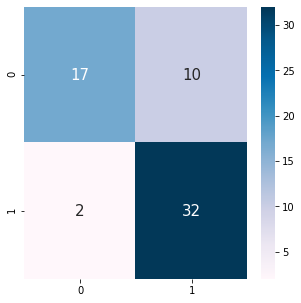

In [90]:

knn_find = KNeighborsClassifier(n_neighbors = 16) #n_neighbors = K value
knn_find.fit(X_train,y_train) 
knn_prediction = knn_find.predict(X_test)
knn_y_predict = knn_find.predict(X_test)
knn_y_pred = cv_svm.predict(X_test)

# evaluating the model
print("Training Accuracy :", knn_find.score(X_train, y_train))
print("Testing Accuracy :", knn_find.score(X_test, y_test))
print("Cross-Validated {}-NN Accuracy: {}".format(16,knn_find.score(X_test,y_test)))

# confusion matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(knn_cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

#sensitivity and specificity
total=sum(sum(knn_cm))
sensitivity = knn_cm[0,0]/(knn_cm[0,0]+knn_cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = knn_cm[1,1]/(knn_cm[1,1]+knn_cm[0,1])
print('Specificity : ', specificity)

# classification report
knn_cr = classification_report(y_test, y_pred)
print(knn_cr)

Confusion Matrix for Random Forest

Training Accuracy : 0.9380165289256198
Testing Accuracy : 0.8688524590163934
Cross-Validated RFC Score: 0.819672131147541
Sensitivity :  0.8518518518518519
Specificity :  0.8823529411764706
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



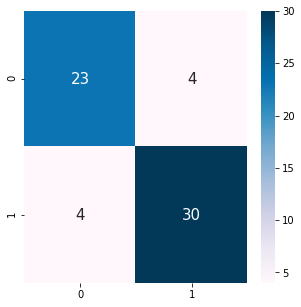

In [89]:
from sklearn.metrics import classification_report

cv_rfc1.fit(X_train, y_train)
y_predict = cv_rfc1.predict(X_test)
y_pred_quant = cv_rfc1.predict_proba(X_test)[:, 1]
y_pred = cv_rfc1.predict(X_test)

# evaluating the model
print("Training Accuracy :", cv_rfc1.score(X_train, y_train))
print("Testing Accuracy :", cv_rfc1.score(X_test, y_test))
print("Cross-Validated RFC Score: {}".format(accuracy_score(y_test,pred)))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

#sensitivity and specificity
total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

# classification report
rfc_cr = classification_report(y_test, y_pred)
print(rfc_cr)

Confusion Matrix for SVM

Training Accuracy : 0.8429752066115702
Testing Accuracy : 0.819672131147541
Cross-Validated SVM Score: 0.8102891156462586
Sensitivity :  0.8333333333333334
Specificity :  0.8108108108108109
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



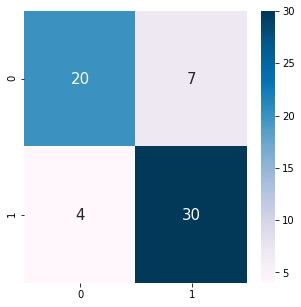

In [92]:
from sklearn.metrics import classification_report
cv_svm.fit(X_train, y_train)
svm_y_predict = cv_svm.predict(X_test)
svm_y_pred = cv_svm.predict(X_test)


# evaluating the model
print("Training Accuracy :", cv_svm.score(X_train, y_train))
print("Testing Accuracy :", cv_svm.score(X_test, y_test))
print("Cross-Validated SVM Score:", best_accuracy)

# confusion matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(svm_cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

#sensitivity and specificity
total=sum(sum(svm_cm))
sensitivity = svm_cm[0,0]/(svm_cm[0,0]+svm_cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = svm_cm[1,1]/(svm_cm[1,1]+svm_cm[0,1])
print('Specificity : ', specificity)

# classification report
rfc_cr = classification_report(y_test, svm_y_pred)
print(rfc_cr)

# **Results**

In [23]:
print("KNN Testing Accuracy :", cv_svm.score(X_test, y_test))
print("KNN Cross-Validated {}-NN Accuracy: {}".format(16,knn_find.score(X_test,y_test)))

print("Random Forest Testing Accuracy :", cv_rfc1.score(X_test, y_test))
print("Random Forest Cross-Validated RFC Score: {}".format(accuracy_score(y_test,pred)))

print("SVM Testing Accuracy :", svm_scores.mean())
print("SVM Cross-Validated SVM Score:", best_accuracy)


KNN Testing Accuracy : 0.819672131147541


NameError: ignored